In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
df =pd.read_csv("Position_Salaries.csv")
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 264.0+ bytes


In [4]:
df.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [5]:
df.tail()

,Position,Level,Salary
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [6]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


<IPython.core.display.Javascript object>

C:\Users\Trapti\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

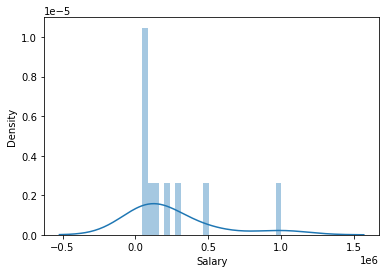

In [7]:
sns.distplot(df.Salary, bins = 25) 


<IPython.core.display.Javascript object>

C:\Users\Trapti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary', ylabel='count'>

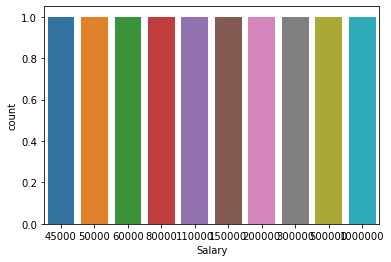

In [8]:
sns.countplot(df['Salary']) 

In [9]:
corr_matrix = abs(df.corr())
print(corr_matrix["Salary"].sort_values(ascending=False)) 

Salary    1.000000
Level     0.817949
Name: Salary, dtype: float64


In [10]:
df2 =df

In [11]:
from sklearn.preprocessing import LabelEncoder

number =LabelEncoder()
df["Position"]=number.fit_transform(df["Position"].astype('str'))
df.head()

,Position,Level,Salary
0,0,1,45000
1,4,2,50000
2,8,3,60000
3,5,4,80000
4,3,5,110000


In [12]:
X =df.drop('Salary',axis=1)
Y = df['Salary']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,Y, test_size=0.2, random_state =0)

In [14]:
from sklearn.tree import DecisionTreeRegressor

model =DecisionTreeRegressor()
model.fit(X,Y)

DecisionTreeRegressor()

In [15]:
model.score(X,Y)

1.0

In [25]:
train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)
print(train_score)
print(test_score)

1.0
1.0


In [17]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
y_pred = model.predict(X_test)


In [26]:
len(X_train)

8

# Dummy Encoding

In [ ]:
df =pd.get_dummies(df2, prefix=None, prefix_sep='Position', dummy_na=False, dtype=int)
df =pd.get_dummies(df2, prefix=None, prefix_sep='Level', dummy_na=False, dtype=int)

In [ ]:
df

# Now applying regression techniques

In [2]:
X = df.drop('Salary',axis=1)
Y = df['Salary']

NameError: name 'df' is not defined

In [28]:
Y

0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64

In [1]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,Y, test_size=0.2, random_state =0)

NameError: name 'X' is not defined

In [30]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [31]:
train_score = reg.score(X_train,y_train)
test_score = reg.score(X_test,y_test)
print(train_score)
print(test_score)

0.8820199222803587
-1.1242305845367753


In [32]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
y_pred = reg.predict(X_test)


In [33]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=150,n_estimators=100)
rfr.fit(X_train,y_train)
#Predicting the Test set results
y_pred_rfr = rfr.predict(X_train)
score = r2_score(y_train,y_pred_rfr)
print("Score of Training:",100*score)
print("RMSE :" , np.sqrt(mean_squared_error(y_train,y_pred_rfr))) 
#print("Mean Absolute Error",mean_absolute_error(y_test,y_pred_rfr))
train_score = rfr.score(X_train,y_train)
test_score = rfr.score(X_test,y_test)
print(train_score)
print(test_score)

Score of Training: 88.60324860092138
RMSE : 100394.0112755736
0.8860324860092138
0.9110338584710744
